<a href="https://colab.research.google.com/github/YejinShin1/god_yes_jeans/blob/master/topic_modelling_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os 
import pandas as pd 
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import CoherenceModel
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [9]:
file_name = os.listdir('./')
file_name

['.config', 'KCTI_NATIVE_2019.xlsx', 'sample_data']

In [11]:
df = pd.read_excel('KCTI_NATIVE_2019.xlsx')
df.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,종합쇼핑,M,40,201901,WHITE,활동,1878919479,63579
1,대전,세종,.,취미오락,외식,M,20,201901,WHITE,휴식,69452328,2952
2,서울,세종,.,취미오락,외식,F,40,201901,RED,휴식,9267020,286
3,경남,세종,.,취미오락,종합쇼핑,M,50,201901,RED,휴식,603499,20
4,충북,세종,.,취미오락,종합쇼핑,F,40,201901,WHITE,활동,107638881,2379


In [12]:
v1 = df['v1'].tolist()
v2 = df['v2'].tolist()
#v3 = df['v3'].tolist()
gb3 = df['gb3'].tolist()
gb2 = df['gb2'].tolist()
sex_ccd = df['sex_ccd'].tolist()
cln_age_r = df['cln_age_r'].tolist()
ta_ym = df['ta_ym'].tolist()
daw_ccd_r = df['daw_ccd_r'].tolist()
apv_ts_dl_tm_r = df['apv_ts_dl_tm_r'].tolist()

cln_age_r = [str(age) for age in cln_age_r]
ta_ym = [str(ym) for ym in ta_ym]

In [13]:
v1 = [city + str("_거주지") for city in v1]
v2 = [city + str("_사용장소") for city in v2]

In [14]:
df_list = list(zip(v1, v2, gb3, gb2, sex_ccd, cln_age_r, ta_ym, daw_ccd_r, apv_ts_dl_tm_r))
df_list = [list(customer) for customer in df_list]
df_list[:10]

[['세종_거주지', '세종_사용장소', '취미오락', '종합쇼핑', 'M', '40', '201901', 'WHITE', '활동'],
 ['대전_거주지', '세종_사용장소', '취미오락', '외식', 'M', '20', '201901', 'WHITE', '휴식'],
 ['서울_거주지', '세종_사용장소', '취미오락', '외식', 'F', '40', '201901', 'RED', '휴식'],
 ['경남_거주지', '세종_사용장소', '취미오락', '종합쇼핑', 'M', '50', '201901', 'RED', '휴식'],
 ['충북_거주지', '세종_사용장소', '취미오락', '종합쇼핑', 'F', '40', '201901', 'WHITE', '활동'],
 ['충북_거주지', '세종_사용장소', '취미오락', '목욕', 'M', '30', '201901', 'RED', '활동'],
 ['부산_거주지', '세종_사용장소', '취미오락', '외식', 'M', '50', '201901', 'WHITE', '휴식'],
 ['대전_거주지', '세종_사용장소', '스포츠활동', '레저스포츠', 'M', '30', '201901', 'WHITE', '활동'],
 ['세종_거주지', '세종_사용장소', '취미오락', '종합쇼핑', 'M', '20', '201901', 'WHITE', '휴식'],
 ['전북_거주지', '세종_사용장소', '취미오락', '외식', 'M', '60', '201901', 'RED', '활동']]

In [15]:
dictionary = corpora.Dictionary(df_list)
corpus = [dictionary.doc2bow(text) for text in df_list]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 80
Number of documents: 1048575


In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary,
                        alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [17]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df_list, start=2, limit=40, step=6)

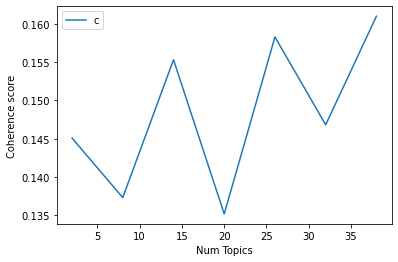

In [18]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
ldamodel.log_perplexity(corpus)

In [ ]:
start1 = 2
limit1 = 40
step1 = 6
perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                    id2word=dictionary,
                    alpha='auto')
    perplexity_scores.append(ldamodel.log_perplexity(corpus))

In [ ]:
perplexity_scores

[-4.069106674659915,
 -4.069100466174727,
 -4.0691018593070325,
 -4.069096671491126,
 -4.069091581746771,
 -4.069091528035872,
 -4.069092169577556]

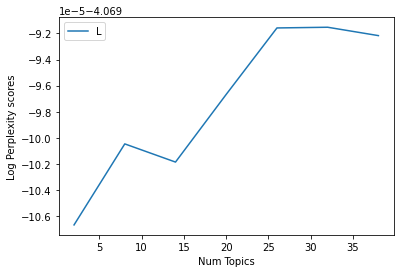

In [ ]:
import matplotlib.pyplot as plt
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

In [ ]:
# Topic 개수 20개
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary)

ldamodel.print_topics(num_words=20)

In [ ]:
ldamodel_15 = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary)

ldamodel_15.print_topics(num_words=20)

In [ ]:
#Topic 개수 13개
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=13, id2word = dictionary)

ldamodel.print_topics(num_words=20)

In [ ]:
before_covid = df[df['ta_ym'] != 202002]
after_covid = df[df['ta_ym'] == 202002]

In [ ]:
b_v1 = before_covid['v1'].tolist()
b_v2 = before_covid['v2'].tolist()
#v3 = df['v3'].tolist()
b_gb3 = before_covid['gb3'].tolist()
b_gb2 = before_covid['gb2'].tolist()
b_sex_ccd = before_covid['sex_ccd'].tolist()
b_cln_age_r = before_covid['cln_age_r'].tolist()
b_ta_ym = before_covid['ta_ym'].tolist()
b_daw_ccd_r = before_covid['daw_ccd_r'].tolist()
b_apv_ts_dl_tm_r = before_covid['apv_ts_dl_tm_r'].tolist()

b_cln_age_r = [str(age) for age in b_cln_age_r]
b_ta_ym = [str(ym) for ym in b_ta_ym]

b_v1 = [city + str("_거주지") for city in b_v1]
b_v2 = [city + str("_사용장소") for city in b_v2]

In [ ]:
b_list = list(zip(b_v1, b_v2, b_gb3, b_gb2, b_sex_ccd, b_cln_age_r, b_ta_ym, b_daw_ccd_r, b_apv_ts_dl_tm_r))
b_list = [list(customer) for customer in b_list]
b_list[:10]

[['경기_거주지', '세종_사용장소', '취미오락', '유흥', 'M', '40', '202001', 'RED', '휴식'],
 ['경남_거주지', '세종_사용장소', '스포츠활동', '레저스포츠', 'M', '30', '202001', 'RED', '활동'],
 ['광주_거주지', '세종_사용장소', '취미오락', '패션쇼핑', 'M', '30', '202001', 'RED', '휴식'],
 ['인천_거주지', '세종_사용장소', '취미오락', '인터넷게임', 'M', '30', '202001', 'RED', '취침'],
 ['경기_거주지', '세종_사용장소', '취미오락', '유흥', 'M', '40', '202001', 'RED', '취침'],
 ['서울_거주지', '세종_사용장소', '스포츠활동', '스포츠용품구매', 'M', '40', '202001', 'RED', '활동'],
 ['제주_거주지', '세종_사용장소', '스포츠활동', '레저스포츠', 'M', '50', '202001', 'RED', '활동'],
 ['서울_거주지', '세종_사용장소', '취미오락', '목욕', 'M', '20', '202001', 'WHITE', '취침'],
 ['강원_거주지', '세종_사용장소', '스포츠활동', '레저스포츠', 'F', '20', '202001', 'RED', '활동'],
 ['세종_거주지', '세종_사용장소', '취미오락', '독서', 'M', '60', '202001', 'RED', '휴식']]

In [ ]:
b_dictionary = corpora.Dictionary(b_list)
b_corpus = [dictionary.doc2bow(text) for text in b_list]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 79
Number of documents: 1015403


In [ ]:
ldamodel.log_perplexity(b_corpus)

-3.9809605970463133

In [ ]:
start1 = 2
limit1 = 40
step1 = 6
b_perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(b_corpus, num_topics=num_topics,
                    id2word=b_dictionary,
                    alpha='auto')
    b_perplexity_scores.append(ldamodel.log_perplexity(b_corpus))

In [ ]:
b_perplexity_scores 

[-3.980970514435481,
 -3.980956165409657,
 -3.9809536259989877,
 -3.9809770389930668,
 -3.98096131786865,
 -3.980977592036755,
 -3.980959095266917]

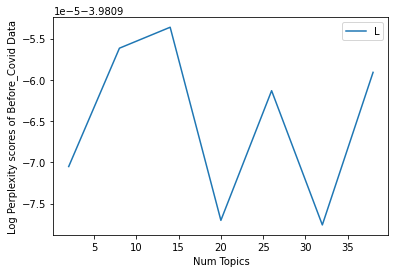

In [ ]:
import matplotlib.pyplot as plt
x = range(start1, limit1, step1)
plt.plot(x, b_perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores of Before_Covid Data")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

In [ ]:
# Topic 개수 20개
b_ldamodel = gensim.models.ldamodel.LdaModel(b_corpus, num_topics=20, id2word = b_dictionary)

b_ldamodel.print_topics(num_words=20)

In [ ]:
!pip install pyLDAvis
import pyLDAvis.gensim as gensimvis
import pyLDAvis

     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 552kB 19.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=b09962339a6f77d46494591f97301258c7864c5ab51f44e2eb29e9e2f081f2aa
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=2e895bbe94dc912c0e6545740ff6e1da7ad9117535a2d366b6391bd8f7056f28
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)

In [ ]:
prepared_data_15 = gensimvis.prepare(ldamodel_15, corpus, dictionary)

In [ ]:
pyLDAvis.display(prepared_data_15)

In [ ]:
pyLDAvis.save_html(prepared_data, 'LDAvis15.html')

In [ ]:
# Topic 개수 19개
b_ldamodel = gensim.models.ldamodel.LdaModel(b_corpus, num_topics=19, id2word = b_dictionary)

b_ldamodel.print_topics(num_words=20)

In [ ]:
prepared_data = gensimvis.prepare(b_ldamodel, b_corpus, b_dictionary)

In [ ]:
pyLDAvis.display(prepared_data)

In [ ]:
pyLDAvis.save_html(prepared_data, 'LDAvis_b_19.html')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')